In [6]:
import model2 as model
import fitness2 as fitness
import numpy as np
from matplotlib import pyplot as plt

In [7]:
""" some additional functions for generating averaged plots """

def get_node_degrees(net, size):
    """
    Returns degree over time for every node 
    """
    node_degrees = []
    times = []
    for i in range(size):
        k, t = net.get_degree_wrt_time(i)
        node_degrees.append(k)
        times.append(t)

    return times, node_degrees

def simulate(size, iterations, fitness):
    """
    Runs model 'iterations' times
    Returns list of final states of the network for each run
    """
    node_degrees = []
    times = []

    for i in range(iterations):
        network = model.network()
        network.generator.fitness_data = fitness
        network.set_fitness_distr('data')
        network.generate_network(size)
        
        t, k = get_node_degrees(network, size)
        node_degrees.append(k)
        times.append(t)

    return times, node_degrees, network

def clone_shape(arr):
    """
    Creates copy of multidimensional list filled with zeros
    Additional function for get_means()
    """
    res = []
    for x in arr:
        res.append(np.zeros_like(x))
    return res

def get_means(arr):
    """
    Calculates average degrees for all nodes over time for multiple model runs
    Input:
        Result array from simulate()
    """
    summ = clone_shape(arr[0])
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            for k in range(len(arr[i][j])):
                summ[j][k] += arr[i][j][k]

    means = [[value / len(arr) for value in subarr] for subarr in summ]

    return means

def plot_graphs(times, mean_degrees, picked_nodes, resolution, fitness_data):
    """
    Plots dynamics of picked nodes over time
    Input:
        times - array with time values for corresponding nodes
        mean_degrees - averaged node dynamics of the model
        picked_nodes - nodes of which to plot degree dynamics
        resolution - rate at which points on the graph are printed
    """
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))

    # standard graph
    ax1 = axs[0]
    for node in picked_nodes:
        times_temp = []
        degrees_temp = []
        for i in range(len(mean_degrees[node])):
            if times[0][node][i] % resolution == 0:
                times_temp.append(times[0][node][i])
                degrees_temp.append(mean_degrees[node][i])         

        ax1.plot(times_temp, degrees_temp, '-s', label=f'Node {node}')

    legend_labels = [f'Node {node}, $\eta = $ {np.round(fitness_data[node], 3)}' for node in picked_nodes]

    ax1.legend(legend_labels)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Degree')

    # loglog graph
    lnt, lnk = [], []

    for x in times[0]: lnt.append(np.log(x))
    for x in mean_degrees: lnk.append(np.log(x))
        
    ax2 = axs[1]
    for node in picked_nodes:
        times_temp = [lnt[node][0]]
        degrees_temp = [lnk[node][0]]
        for i in range(len(lnk[node])):
            if times[0][node][i] % resolution == 0:
                times_temp.append(lnt[node][i])
                degrees_temp.append(lnk[node][i])         

        ax2.plot(times_temp, degrees_temp, '-s', label=f'Node {node}')

    legend_labels = [f'Node {node}, $\eta = $ {np.round(fitness_data[node], 3)}' for node in picked_nodes]

    ax2.legend(legend_labels)
    ax2.set_xlabel('log(Time)')
    ax2.set_ylabel('log(Degree)')

    plt.tight_layout()



In [58]:
""" averaging 20 runs with 5000 time points each for exponential fitness distr"""

size = 10000
iterations = 20
rng = np.random.default_rng(1234)
fitness_data = rng.exponential(1.0,size)

times, node_degrees = simulate(size, iterations, fitness_data)

mean_degrees_exp = get_means(node_degrees)

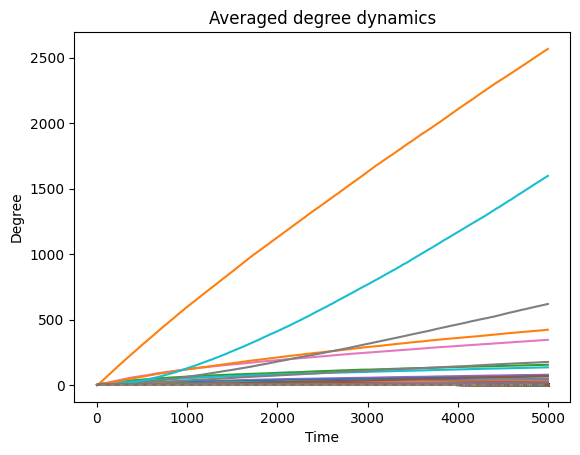

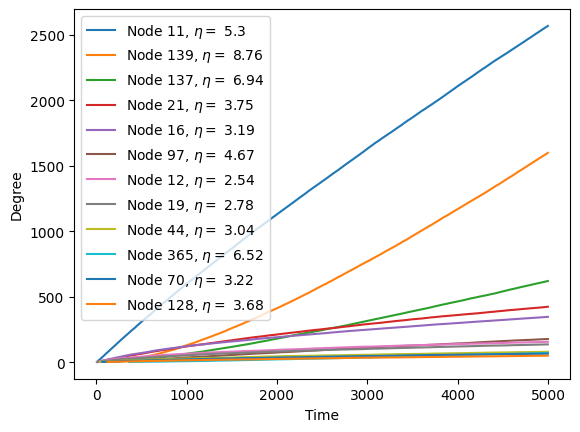

In [59]:
for i in range(len(mean_degrees_exp)):
    plt.plot(times[0][i], mean_degrees_exp[i])

plt.xlabel('Time')
plt.ylabel('Degree')
plt.title(f'Averaged degree dynamics')

# plotting only nodes with high degree
end_time_degrees = [mean_degrees_exp[node][-1] for node in range(size)]
top_nodes = sorted(range(size), key=lambda x: end_time_degrees[x], reverse=True)[:12]

plt.figure()
for node in top_nodes:
    plt.plot(times[0][node], mean_degrees_exp[node], label=f'Node {node}')

legend_labels = [f'Node {node}, $\eta = $ {np.round(fitness_data[node],2)}' for node in top_nodes]

plt.legend(legend_labels)
plt.xlabel('Time')
plt.ylabel('Degree')
plt.show()

In [9]:
""" the same but for uniform distr """

size = 10_000
iterations = 50
rng = np.random.default_rng(1234)
fitness_data = rng.random(size)

times, node_degrees, net_uniform = simulate(size, iterations, fitness_data)

mean_degrees_uniform = get_means(node_degrees)

C:\Users\Leo\AppData\Local\Temp\ipykernel_1248\1511997744.py:75: RuntimeWarning: divide by zero encountered in log
  lnt.append(np.log(x))


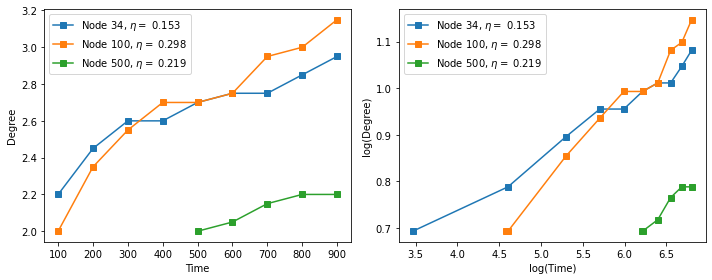

In [16]:
plot_graphs(times, mean_degrees_uniform, [34, 967, 2400], 100, fitness_data)
plt.savefig('bb_degrees_10000_50', dpi=400)

In [4]:
generator = fitness.generator()

generator.set_current_distribution('delta')
generator.set_param_beta(2, 2)

n_samples = 10000

# Generate values
y_samples = []

for _ in range(n_samples):
    y_samples.append(generator.generate_value())

fitness_data_delta = y_samples

In [5]:
size = n_samples
iterations = 50

times, node_degrees = simulate(size, iterations, fitness_data_delta)

mean_degrees_delta = get_means(node_degrees)

ValueError: too many values to unpack (expected 2)

C:\Users\Leont\AppData\Local\Temp\ipykernel_1288\879623632.py:74: RuntimeWarning: divide by zero encountered in log
  lnt.append(np.log(x))


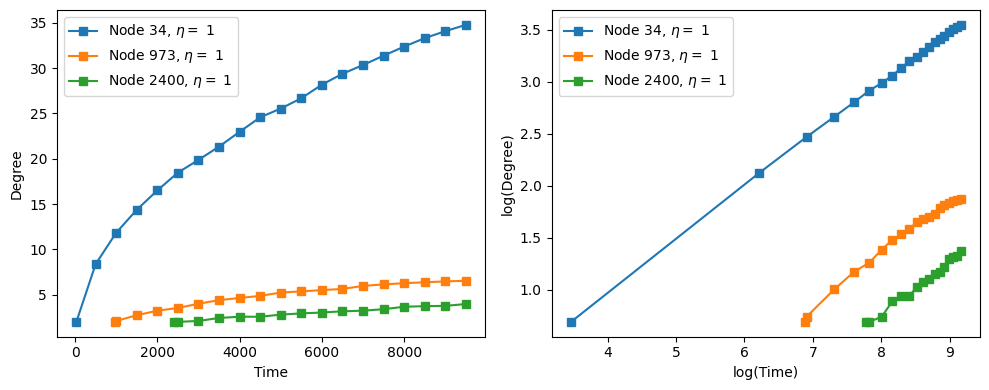

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_graphs(times, mean_degrees_delta, [34, 967, 2400], 500, fitness_data_delta)
plt.savefig('ba_degrees_10000_50.png', dpi=400)

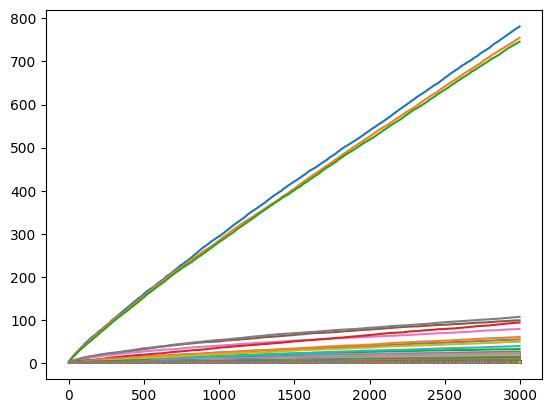

In [115]:
import matplotlib.pyplot as plt

for i in range(len(mean_degrees_be)):
    plt.plot(times[0][i], mean_degrees_be[i])